veriler1= [273 531 188 198 227 300 186 109 156 108 106 404 315 612 642 359 271 267
 257 406 217 167 328 234 306 311 153 389]
year= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
n= 28


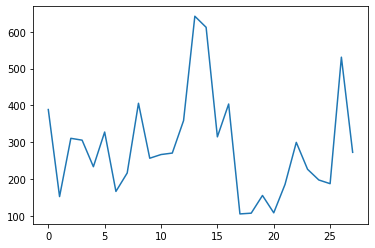

In [ ]:
import numpy as np
import pandas as pd 
import math
from scipy.stats import pearson3
import matplotlib.pyplot as plt
data=pd.read_excel("Xd.xlsx")
veriler=np.array(data["Max(Aza)"])
year=np.array(data["year"])
veriler1=veriler[::-1]
n=len(veriler1)
print("veriler1=",veriler1)
print("year=",year)
print("n=",n)
plt.plot(veriler)

In [ ]:
#Büyükten küçüğe sıralama
veriler1.sort()
print (veriler1[::-1])
ortalama = veriler1.mean()
print ("ortalama =",veriler1.mean())
max = veriler1.max()
print ("max =",veriler1.max())
min = veriler1.min()
print ("min =",veriler1.min())
std_sapma = veriler1.std(ddof=1)
print ("std_sapma =",veriler1.std(ddof=1)) #N<30 olduğundan N-1 kabul edildi; N>30 olsaydı ddof=1 kısmı olmayacaktı
varyans = veriler1.var(ddof=1)
print ("varyans =",veriler1.var(ddof=1)) #N<30 olduğundan N-1 kabul edildi; N>30 olsaydı ddof=1 kısmı olmayacaktı
Altçeyrek = np.quantile(veriler1, .25)
print("Alt Çeyrek = ", np.quantile(veriler1, .25))
medyan = np.quantile(veriler1, .5)
print("medyan = ", np.quantile(veriler1, .5))
Üstçeyrek = np.quantile(veriler1, .75)
print("Üst Çeyrek = ", np.quantile(veriler1, .75))
print("IQR=",(np.quantile(veriler1, .75)-np.quantile(veriler1, .25)))
Cvx = veriler1.std(ddof=1)/veriler1.mean()
print("Cvx=",veriler1.std(ddof=1)/veriler1.mean())
deviations = [(x - veriler1.mean()) ** 2 for x in veriler1] #(X-Xi)^2
deviations1 = [(x - veriler1.mean()) ** 3 for x in veriler1] #(X-Xi)^3
print("(X-Xi)^2=",sum(deviations))
print("(X-Xi)^3=",sum(deviations1))
Csx= ((sum(deviations1)/veriler1.std(ddof=1)**3)*(n/((n-1)*(n-2))))
print("Csx=",((sum(deviations1)/veriler1.std(ddof=1)**3)*(n/((n-1)*(n-2)))))

[642 612 531 406 404 389 359 328 315 311 306 300 273 271 267 257 234 227
 217 198 188 186 167 156 153 109 108 106]
ortalama = 286.42857142857144
max = 642
min = 106
std_sapma = 139.46629184446886
varyans = 19450.846560846563
Alt Çeyrek =  187.5
medyan =  269.0
Üst Çeyrek =  335.75
IQR= 148.25
Cvx= 0.48691473461909324
(X-Xi)^2= 525172.8571428572
(X-Xi)^3= 72186753.55102038
Csx= 1.0613794337994817


In [ ]:
#B değerleri hesabı
print("B0=", sum(veriler1)/n)
B0=sum(veriler1)/n
b1=[]
for j in range(1,n+1):
    x=(veriler[j-1])*(n-j)/(n*(n-1))
    b1.append(x)
print("B1=",sum(b1))
B1=sum(b1)
b2=[]
for j in range(1,n+1):
    y=(veriler[j-1])*(n-j)*(n-j-1)/(n*(n-1)*(n-2))
    b2.append(y)
print("B2=",sum(b2))
B2=sum(b2)
b3=[]
for j in range(1,n+1):
    z=(veriler[j-1])*(n-j)*(n-j-1)*(n-j-2)/(n*(n-1)*(n-2)*(n-3))
    b3.append(z)
print("B3=",sum(b3))
B3=sum(b3)

B0= 286.42857142857144
B1= 181.61375661375664
B2= 136.53947903947903
B3= 110.82775335775337


In [ ]:
#Lamda Değerleri
λ1=B0
λ2=2*B1-B0
λ3=6*B2-6*B1+B0
λ4=20*B3-30*B2+12*B1-B0
Lcv=λ2/λ1
Lcs=λ3/λ2
Lkurtosis=λ4/λ2
print("λ1=",λ1)
print("λ2=",λ2)
print("λ3=",λ3)
print("λ4=",λ4)
print("Lcv=",Lcv) #L Değişim Katsayısı
print("Lcs=",Lcs) #L Çarpıklık Katsayısı
print("Lkurtosis=",Lkurtosis) #L Kurtosis Katsayısı

λ1= 286.42857142857144
λ2= 76.79894179894183
λ3= 15.98290598290589
λ4= 13.307203907204098
Lcv= 0.268125981342939
Lcs= 0.20811362251251894
Lkurtosis= 0.173273271681817


In [ ]:
#Zp Değerleri t, taşkın verisi olduğu için verilmiştir
Zp10t=1.281278358 #10 yıl için taşkın analizi Zp değeri
Zp25t=1.756693896 #25 yıl için taşkın analizi Zp değeri
Zp50t=2.063623261 #50 yıl için taşkın analizi Zp değeri
Zp100t=2.337277612 #100 yıl için taşkın analizi Zp değeri
Zp200t=2.583619641 #200 yıl için taşkın analizi Zp değeri
Zp500t=2.873798767 #500 yıl için taşkın analizi Zp değeri
print("Zp10t=",Zp10t)
print("Zp25t=",Zp25t)
print("Zp50t=",Zp50t)
print("Zp100t=",Zp100t)
print("Zp200t=",Zp200t)
print("Zp500t=",Zp500t)

Zp10t= 1.281278358
Zp25t= 1.756693896
Zp50t= 2.063623261
Zp100t= 2.337277612
Zp200t= 2.583619641
Zp500t= 2.873798767


In [ ]:
#Normal Dağılım taşkın değerleri
Xp10tnor=ortalama+std_sapma*Zp10t
Xp25tnor=ortalama+std_sapma*Zp25t
Xp50tnor=ortalama+std_sapma*Zp50t
Xp100tnor=ortalama+std_sapma*Zp100t
Xp200tnor=ortalama+std_sapma*Zp200t
Xp500tnor=ortalama+std_sapma*Zp500t
print("Xp10tnor=",Xp10tnor)
print("Xp25tnor=",Xp25tnor)
print("Xp50tnor=",Xp50tnor)
print("Xp100tnor=",Xp100tnor)
print("Xp200tnor=",Xp200tnor)
print("Xp500tnor=",Xp500tnor)

Xp10tnor= 465.12371283940126
Xp25tnor= 531.4281550095045
Xp50tnor= 574.234455404232
Xp100tnor= 612.4000129853066
Xp200tnor= 646.7564222953793
Xp500tnor= 687.2266289692682


In [ ]:
#Lognormal Dağılım taşkın değerleri
#X ve Y değişkeninin dağılımlarının momentleri arasındaki ilişki:
sigma_y=np.log(1+(varyans/ortalama**2))**0.5
print("sigma_y=",sigma_y)
nu_y=np.log(ortalama)-(0.5*(sigma_y**2))
print("nu_y=",nu_y)
Xp10tlogn=math.exp(nu_y+Zp10t*sigma_y)
Xp25tlogn=math.exp(nu_y+Zp25t*sigma_y)
Xp50tlogn=math.exp(nu_y+Zp50t*sigma_y)
Xp100tlogn=math.exp(nu_y+Zp100t*sigma_y)
Xp200tlogn=math.exp(nu_y+Zp200t*sigma_y)
Xp500tlogn=math.exp(nu_y+Zp500t*sigma_y)
print("Xp10tlogn=",Xp10tlogn)
print("Xp25tlogn=",Xp25tlogn)
print("Xp50tlogn=",Xp50tlogn)
print("Xp100tlogn=",Xp100tlogn)
print("Xp200tlogn=",Xp200tlogn)
print("Xp500tlogn=",Xp500tlogn)


sigma_y= 0.4612576077643945
nu_y= 5.55110990032509
Xp10tlogn= 465.0334277399968
Xp25tlogn= 579.0554979541268
Xp50tlogn= 667.1212603524333
Xp100tlogn= 756.874141711904
Xp200tlogn= 847.9520719823008
Xp500tlogn= 969.3943012791302


In [ ]:
#3 Parametreli Lognormal Dağılım taşkın değerleri
Xo=(max*min-medyan**2)/(max+min-2*medyan)
print("Xo=",Xo)
if (max+min-2*medyan)>0:
  print("Xo bir alt sınır")
if (max+min-2*medyan)<0:
  print("Xo bir üst sınır")
Y=[np.log(x - Xo) for x in veriler1]
print("Y=",Y)
from scipy.stats import skew
çarpıklık_y=skew(Y)
print("çarpıklık_y=",çarpıklık_y) #Y=ln(X)
Yo=np.mean(Y)
print("Yo=",Yo)
std_sapma_y=np.std(Y)
print("std_sapma_y=",std_sapma_y)
Y10t3par=std_sapma_y*Zp10t+Yo
Y25t3par=std_sapma_y*Zp25t+Yo
Y50t3par=std_sapma_y*Zp50t+Yo
Y100t3par=std_sapma_y*Zp100t+Yo
Y200t3par=std_sapma_y*Zp200t+Yo
Y500t3par=std_sapma_y*Zp500t+Yo
print("Y10t3par=",Y10t3par)
print("Y25t3par=",Y25t3par)
print("Y50t3par=",Y50t3par)
print("Y100t3par=",Y100t3par)
print("Y200t3par=",Y200t3par)
print("Y500t3par=",Y500t3par)
Xp10t3par=math.exp(Y10t3par)+Xo
Xp25t3par=math.exp(Y25t3par)+Xo
Xp50t3par=math.exp(Y50t3par)+Xo
Xp100t3par=math.exp(Y100t3par)+Xo
Xp200t3par=math.exp(Y200t3par)+Xo
Xp500t3par=math.exp(Y500t3par)+Xo
print("Xp10t3par=",Xp10t3par)
print("Xp25t3par=",Xp25t3par)
print("Xp50t3par=",Xp50t3par)
print("Xp100t3par=",Xp100t3par)
print("Xp200t3par=",Xp200t3par)
print("Xp500t3par=",Xp500t3par)

Xo= -20.51904761904762
Xo bir alt sınır
Y= [4.840392870896056, 4.856077123848645, 4.863827956184899, 5.156287377908856, 5.173428789072083, 5.233880427552412, 5.3303926484331585, 5.340030392553237, 5.386873185194056, 5.47024782076006, 5.51148753912443, 5.539375676486805, 5.625889570899507, 5.661289110630791, 5.675105347117326, 5.6819425353533175, 5.7699417055434425, 5.78848828581744, 5.803685266856207, 5.81567872862743, 5.853692884715739, 5.93890478693068, 6.014983416543595, 6.05095687546099, 6.055657026237066, 6.312676375937661, 6.449710334960957, 6.4960493085701625]
çarpıklık_y= 0.0054355703002056605
Yo= 5.632034048864893
std_sapma_y= 0.4365038258018799
Y10t3par= 6.191316954049043
Y25t3par= 6.398837655231702
Y50t3par= 6.532813497305144
Y100t3par= 6.652264668463975
Y200t3par= 6.759793906578272
Y500t3par= 6.886458205245118
Xp10t3par= 467.9699527383861
Xp25t3par= 580.6268452244357
Xp50t3par= 666.8102451659188
Xp100t3par= 754.0173614028756
Xp200t3par= 841.9453816072214
Xp500t3par= 958.409

In [ ]:
#Gumbell Dağılımı
alfa=0.7797*std_sapma
print("alfa=",alfa)
ksi=ortalama-0.5772*alfa
print("ksi=",ksi)
Xp10tgumb=ksi-(alfa*np.log(-np.log(0.9)))
Xp25tgumb=ksi-(alfa*np.log(-np.log(0.96)))
Xp50tgumb=ksi-(alfa*np.log(-np.log(0.98)))
Xp100tgumb=ksi-(alfa*np.log(-np.log(0.99)))
Xp200tgumb=ksi-(alfa*np.log(-np.log(0.995)))
Xp500tgumb=ksi-(alfa*np.log(-np.log(0.998)))
print("Xp10tgumb=",Xp10tgumb)
print("Xp25tgumb=",Xp25tgumb)
print("Xp50tgumb=",Xp50tgumb)
print("Xp100tgumb=",Xp100tgumb)
print("Xp200tgumb=",Xp200tgumb)
print("Xp500tgumb=",Xp500tgumb)

alfa= 108.74186775113236
ksi= 223.66276536261785
Xp10tgumb= 468.371911660697
Xp25tgumb= 571.4773550181777
Xp50tgumb= 647.966862876907
Xp100tgumb= 723.8915842162304
Xp200tgumb= 799.5392690010025
Xp500tgumb= 899.3420247314918


In [ ]:
#GEV Dağılımı
c=(2*λ2)/(λ3+3*λ2)-(np.log(2)/np.log(3))
print("c=",c)
k=7.8590*c+2.9554*(c**2)
print("k=",k)
Xp10tgev=ksi+((alfa/k)*(1-(-np.log(0.9))**k))
Xp25tgev=ksi+((alfa/k)*(1-(-np.log(0.96))**k))
Xp50tgev=ksi+((alfa/k)*(1-(-np.log(0.98))**k))
Xp100tgev=ksi+((alfa/k)*(1-(-np.log(0.99))**k))
Xp200tgev=ksi+((alfa/k)*(1-(-np.log(0.995))**k))
Xp500tgev=ksi+((alfa/k)*(1-(-np.log(0.998))**k))
print("Xp10tgev=",Xp10tgev)
print("Xp25tgev=",Xp25tgev)
print("Xp50tgev=",Xp50tgev)
print("Xp100tgev=",Xp100tgev)
print("Xp200tgev=",Xp200tgev)
print("Xp500tgev=",Xp500tgev)

c= -0.007510437632875733
k= -0.05885782507409374
Xp10tgev= 485.31782793066
Xp25tgev= 606.3718850840917
Xp50tgev= 700.6438824304591
Xp100tgev= 798.1602179368447
Xp200tgev= 899.3890958153439
Xp500tgev= 1039.4429577893711


In [ ]:
#Pearson Tip 3 Dağılımı
Kp10t=(2/Csx)*(1+(Csx*Zp10t/6)-((Csx**2/36)))**3-(2/Csx)
Kp25t=(2/Csx)*(1+(Csx*Zp25t/6)-((Csx**2/36)))**3-(2/Csx)
Kp50t=(2/Csx)*(1+(Csx*Zp50t/6)-((Csx**2/36)))**3-(2/Csx)
Kp100t=(2/Csx)*(1+(Csx*Zp100t/6)-((Csx**2/36)))**3-(2/Csx)
Kp200t=(2/Csx)*(1+(Csx*Zp200t/6)-((Csx**2/36)))**3-(2/Csx)
Kp500t=(2/Csx)*(1+(Csx*Zp500t/6)-((Csx**2/36)))**3-(2/Csx)
Xp10tpeartip3=ortalama+std_sapma*Kp10t
Xp25tpeartip3=ortalama+std_sapma*Kp25t
Xp50tpeartip3=ortalama+std_sapma*Kp50t
Xp100tpeartip3=ortalama+std_sapma*Kp100t
Xp200tpeartip3=ortalama+std_sapma*Kp200t
Xp500tpeartip3=ortalama+std_sapma*Kp500t
print("Kp10t=",Kp10t)
print("Kp25t=",Kp25t)
print("Kp50t=",Kp50t)
print("Kp100t=",Kp100t)
print("Kp200t=",Kp200t)
print("Kp500t=",Kp500t)
print("Xp10tpeartip3=",Xp10tpeartip3)
print("Xp25tpeartip3=",Xp25tpeartip3)
print("Xp50tpeartip3=",Xp50tpeartip3)
print("Xp100tpeartip3=",Xp100tpeartip3)
print("Xp200tpeartip3=",Xp200tpeartip3)
print("Xp500tpeartip3=",Xp500tpeartip3)

Kp10t= 1.3341852713546973
Kp25t= 2.0624151347321664
Kp50t= 2.5864879426218046
Kp100t= 3.091174964164958
Kp200t= 3.576774460949257
Kp500t= 4.1881243050704
Xp10tpeartip3= 472.50244385791757
Xp25tpeartip3= 574.0659625135773
Xp50tpeartip3= 647.1564536864639
Xp100tpeartip3= 717.5432811231171
Xp200tpeartip3= 785.2680422611633
Xp500tpeartip3= 870.5307380404332


In [ ]:
#Log Pearson Tip3 Dağılımı
rv = pearson3(Csx,10)
print(rv)

In [ ]:
#S Test Kontrol için YANLIŞ
for x in range(0,n):
  e1=sum(veriler1[x]==veriler1[x+1:])
  e1=0+e1
if e1==0:
 print("Tekrar eden veri yok")
m1=0
for x in range (0,n):
  b1=sum(veriler1[x]<veriler1[x:])
  m1=m1+b1
p1=0
for x in range (0,n):
  d1=sum(veriler1[x]>veriler1[x:])
  p1=p1+d1
s1=p1-m1
print("s1=",s1)

Tekrar eden veri yok
s1= -378


In [ ]:
#Mann-Kendall Trend Testi
#S=P-M değerinin bulunması
for x in range(0,n):
  e1=sum(veriler1[x]==veriler1[x+1:])
  e1=0+e1

if e1==0:
  print("Tekrar eden veri yok, varsa sigma_s formülü değişecek")

!pip install pymannkendall
import pymannkendall as mk

veriler=np.array(data["Max(Aza)"])

result = mk.original_test(veriler)
s=result.s
tau=result.Tau
print("s=",result.s)
print("tau=",result.Tau)

Tekrar eden veri yok, varsa sigma_s formülü değişecek
s= -26.0
tau= -0.06878306878306878


In [ ]:
#S TEST Yanlış
from __future__ import division
from scipy.stats import norm
# calculate S
s_0 = 0
for k in range(n-1):
 for j in range(k+1, n):
  s_0 += np.sign(j - k)
print(s_0)

378


In [ ]:
# calculate the unique data
unique_x, tp = np.unique(x, return_counts=True)
g = len(unique_x)

# calculate the var(s)
if n == g:  # datada eşleşme yok ise
 sigma_s = ((n*(n-1)*(2*n+5))/18)**0.5
else:  # datada eşleşme var ise
 sigma_s = ((n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18)**0.5
print("sigma_s=",sigma_s)
if s > 0:
      print("S 0'dan büyüktür!")
 
if s < 0:
      print("S 0'dan küçüktür!")
 
if s == 0:
     print("S 0'dır!") 

sigma_s= 50.61620293937506
S 0'dan küçüktür!


In [ ]:
#z değeri
if s > 0:
  z=(s-1)/sigma_s
if s < 0:
  z=(s+1)/sigma_s
if s == 0:
  z=0
print("z=",z)
z_alfa=1.96 #alfa = 0.05 için
if abs(z)<z_alfa:
  print("Ho, sıfır hipotezi kabul edilir. Rho=0. Trend Yok")
else:
  print("Ho, sıfır hipotezi kabul edilmez. Trend Var")

z= -0.49391298730849975
Ho, sıfır hipotezi kabul edilir. Rho=0. Trend Yok


In [ ]:
#Otokorelasyon Katsayısnın Bulunması
mean=veriler.mean()
cortoplam=0
for i in range (0,n-1):
 cor1=((veriler[i]-mean)*(veriler[i+1]-mean))
 cortoplam=cor1+cortoplam

corbol=0
for i in range (0,n-1):
  cor2=((veriler[i]-mean)**2)
  corbol=cor2+corbol

corc=cortoplam/corbol
r=str(corc)
print("r(korelasyon katsayısı)="+str(corc))

r(korelasyon katsayısı)=0.3532321587160383


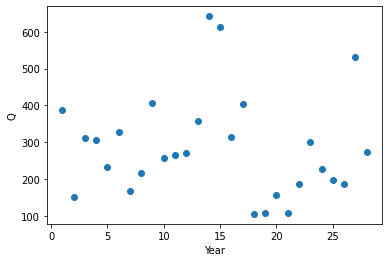

y = -1.42912 * x + 307.15079
m= -1.4291187739516729


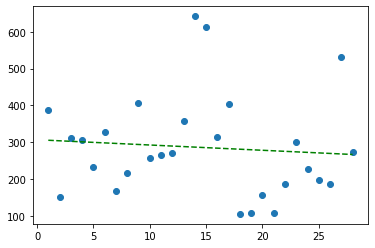

In [ ]:
#Eğri uydurulması ve eğim hesabı
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import curve_fit
from matplotlib import pyplot
x_values=np.array(data["Max(Aza)"])
y_values=np.array(data["year"])
plt.scatter(y_values, x_values)
plt.ylabel('Q')
plt.xlabel('Year')
plt.show()

# objective function
def objective(x, m, b):
	return m * x + b
popt, _ = curve_fit(objective, y_values, x_values)
m, b = popt
print('y = %.5f * x + %.5f' % (m, b))
# plot input vs output
pyplot.scatter(y_values, x_values)
print("m=",m)
plt.plot(y_values, objective(y_values, *popt), 'g--')

In [ ]:
print("veriler=",veriler)
print("corc=",corc)
y_i=[]
for x in year:
 y_i=veriler-(year)*(m)
print("y_i=",y_i)
e_i=np.zeros(28)
e_i[0]=y_i[0]
for i in range(1,n):
 e_i[i]=y_i[i]-(y_i[i-1])*(corc)
for i in year:
   e_i1=e_i+(year)*(m)
print("e_i=",e_i)
print("e_i1=",e_i1)
print("y_i[j-1]",y_i[j-1])

veriler= [389 153 311 306 234 328 167 217 406 257 267 271 359 642 612 315 404 106
 108 156 109 186 300 227 198 188 531 273]
corc= 0.3532321587160383
y_i= [390.42911877 155.85823755 315.28735632 311.7164751  241.14559387
 336.57471264 177.00383142 228.43295019 418.86206897 271.29118774
 282.72030651 288.14942529 377.57854406 662.00766284 633.43678161
 337.86590038 428.29501916 131.72413793 135.15325671 184.58237548
 139.01149425 217.44061303 332.8697318  261.29885057 233.72796935
 225.15708812 569.5862069  313.01532567]
e_i= [390.42911877  17.9461171  260.23321462 200.34684161 131.03731046
 251.39433396  58.1148191  165.90950472 338.17220485 123.33563491
 186.89153463 188.2835211  275.79490053 528.63477863 399.59438578
 114.11565861 308.94991781 -19.56343625  88.62405511 136.84189886
  73.8110633  168.33728283 256.06271467 143.71855664 141.42881229
 142.59685296 490.05348261 111.81916023]
e_i1= [389.          15.08787955 255.9458583  194.63036651 123.89171659
 242.81962131  48.11098768 

In [ ]:
#Mann-Kendall Trend Testi Yeni Ei için
#S=P-M değerinin bulunması
for x in range(0,n-1):
  e2=sum(e_new[x]==e_new[x+1:])
  e2=0+e2

if e2==0:
  print("Tekrar eden veri yok, varsa sigma_s formülü değişecek")

!pip install pymannkendall
import pymannkendall as mk

veri=e_i1

result = mk.original_test(veri)
s_1=result.s
tau=result.Tau
print("s=",result.s)
print("tau=",result.Tau)

Tekrar eden veri yok, varsa sigma_s formülü değişecek
s= -56.0
tau= -0.14814814814814814


In [ ]:
for x in range(0,n):
  e_1=sum(e_i1[x]==e_i1[x+1:])
  e_1=+e_1
if e_1==0:
 print("Tekrar eden veri yok")
m_1=0
for x in range (0,n):
  b_1=sum(e_i1[x]>e_i1[x:])
  m_1=m_1+b_1
p_1=0
for x in range (0,n):
  d_1=sum(e_i1[x]<e_i1[x:])
  p_1=p_1+d_1
s_1=p_1-m_1
print("s_1=",s_1)

Tekrar eden veri yok
s_1= -56


In [ ]:
#tekrar eden veri olmaması durumu
sigma_s1=(n*(n-1)*(2*n+5)/18)**0.5
print("sigma_s1=",sigma_s1)
if s_1 > 0:
      print("S 0'dan büyüktür!")
 
if s_1 < 0:
      print("S 0'dan küçüktür!")
 
if s_1 == 0:
     print("S 0'dır!")

sigma_s1= 50.61620293937506
S 0'dan küçüktür!


In [ ]:
#z değeri
print(s_1)
if s_1 > 0:
  z=(s_1-1)/sigma_s1
if s_1 < 0:
  z=(s_1+1)/sigma_s1
if s_1 == 0:
  z=0
print("z=",z)
z_alfa=1.96 #alfa = 0.05 için
if abs(z)<z_alfa:
  print("Ho, sıfır hipotezi kabul edilir. Rho=0. Trend Yok")
else:
  print("Ho, sıfır hipotezi kabul edilmez. Trend Var")

-56
z= -1.0866085720786995
Ho, sıfır hipotezi kabul edilir. Rho=0. Trend Yok
